## Assignment 2 

### Onset Detector 

Sometimes its useful to find where events in a musical file occurred, these are often called **onsets**. 

They are often characterised by a **peak in the signal** of the audio. 

The simplest approach would be to record every sample above a given threshold as a new onset.

However, these **onsets** and their peaks often occur over a length of time, and so the signal may be above a chosen threshold for a number of samples, but we want to identify these as **a single event**. 

As we step through the signal (sample by sample), there are a number of rules we can apply to determine if something is a **new onset** 

### The Algorithm


1. Is the sample value larger than any of the values surrounding it (+ / - a ``window_size``)?


2. Is the sample value larger than the average of all the values surrounding it (+ / - a ``window_size``)?


3. Have we had a onset recently (within a given ``wait_time``)?


### Task 1

Code an onset detector using the algorithm described above. We have provided a template of an approach you might like to take below. 

We want to save the onsets as we go (the sample location and the value) and then plot them on the **same plot as the original waveform**

The result should look like this (with the audio data in blue and onsets in orange).

There are libraries that will find onsets for you, but we would like you to this yourself implementing the algorithm described!

In [155]:

import librosa
import numpy as np
import matplotlib.pyplot as plt


audio_data, sr = librosa.load('C:/Users/廖周航/mycode/audio_drums0.wav')

window_size = 2048
wait_time = 1024


## for every sample (careful to account for window size at the beginning and end)

    ## if biggest sample value in surrounding area AND
        
    ## if sample value bigger than mean of surrounding area AND
        
    ## if we haven't had an onset recently THEN
            
        ## record time and sample value for plotting later
                
                
## plot audio file

## plot onset times and values on same plot

In [156]:
audio_data, sr = librosa.load('C:/Users/廖周航/mycode/audio_drums0.wav')

print(audio_data, sr)

print(audio_data.shape, sr)

[ 3.48190172e-03 -2.48671300e-03 -1.18883895e-02 ... -3.04646551e-06
 -1.87598368e-06  0.00000000e+00] 22050
(124518,) 22050


In [157]:
# The time of the audio
time= audio_data.shape[0] / sr
print(time)


5.647074829931973


In [158]:
# Compute a spectral flux onset strength envelope.
onset_env = librosa.onset.onset_strength(y=audio_data, sr=sr,
                                             hop_length=512,
                                             aggregate=np.median)


In [159]:
peaks = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 10)

print(peaks)

tempo, beats = librosa.beat.beat_track(y=audio_data, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

[  9  25  39  55  70  82  93 108 123 138 154 169 184 199 214 229]


C:\Users\廖周航\AppData\Local\Temp\ipykernel_16036\1288240065.py:1: FutureWarning: Pass pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=10 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  peaks = librosa.util.peak_pick(onset_env, 3, 3, 3, 5, 0.5, 10)


In [160]:
#Calculate the time of the peak
point_list = librosa.frames_to_time(peaks, sr=sr)
print(point_list)

[0.20897959 0.58049887 0.90557823 1.27709751 1.62539683 1.90403628
 2.15945578 2.5077551  2.85605442 3.20435374 3.57587302 3.92417234
 4.27247166 4.62077098 4.96907029 5.31736961]


In [161]:
time_test_list=point_list*22050
print(time_test_list)

[  4608.  12800.  19968.  28160.  35840.  41984.  47616.  55296.  62976.
  70656.  78848.  86528.  94208. 101888. 109568. 117248.]


16
[0.0059666284, 0.34154853, 0.71817625, 0.5522335, 0.058717366, 0.15870044, 0.5666708, 0.28980675, 0.72138655, 0.7233321, 0.06539118, 0.046030976, 0.61123884, 0.6728365, 0.76933944, 0.3677981]


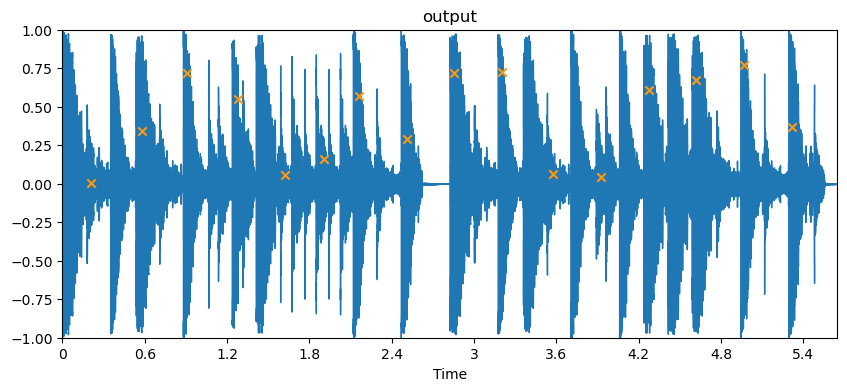

In [162]:

len_peaks= len(peaks)
print(len_peaks)

audio_data_list=[]   
time_list = time_test_list.astype(int)
for i in range(len(peaks)):
 
    audio_data_list.append(abs(audio_data[time_list[i]]))

print(str(audio_data_list))
                                             

# show the librosa wave plot into plt
fig, ax = plt.subplots(figsize=(10,4))
ax.set_ylim(-1,1)
ax.set_xlim(0,time)


librosa.display.waveshow(y=audio_data, sr=sr, ax=ax)

# make the title of plt
plt.title('output')
x=point_list
y=audio_data_list
plt.scatter(x, y, color='#FF9912',marker='x', )



In [163]:

y, sr = librosa.load('C:/Users/廖周航/mycode/audio_drums0.wav')


In [164]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.20897959, 0.37151927, 0.55727891, 0.74303855, 0.90557823,
       1.09133787, 1.27709751, 1.43963719, 1.60217687, 1.71827664,
       1.88081633, 2.06657596, 2.15945578, 2.32199546, 2.48453515,
       2.83283447, 3.0185941 , 3.20435374, 3.39011338, 3.55265306,
       3.71519274, 3.92417234, 4.08671202, 4.27247166, 4.43501134,
       4.62077098, 4.78331066, 4.96907029, 5.15482993, 5.31736961,
       5.50312925])

In [165]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames2 = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
onset_frames2


C:\Users\廖周航\AppData\Local\Temp\ipykernel_16036\339134743.py:2: FutureWarning: Pass y=[ 3.48190172e-03 -2.48671300e-03 -1.18883895e-02 ... -3.04646551e-06
 -1.87598368e-06  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  o_env = librosa.onset.onset_strength(y, sr=sr)


array([  9,  16,  24,  32,  39,  47,  55,  62,  69,  74,  81,  89,  93,
       100, 107, 122, 130, 138, 146, 153, 160, 169, 176, 184, 191, 199,
       206, 214, 222, 229, 237], dtype=int64)

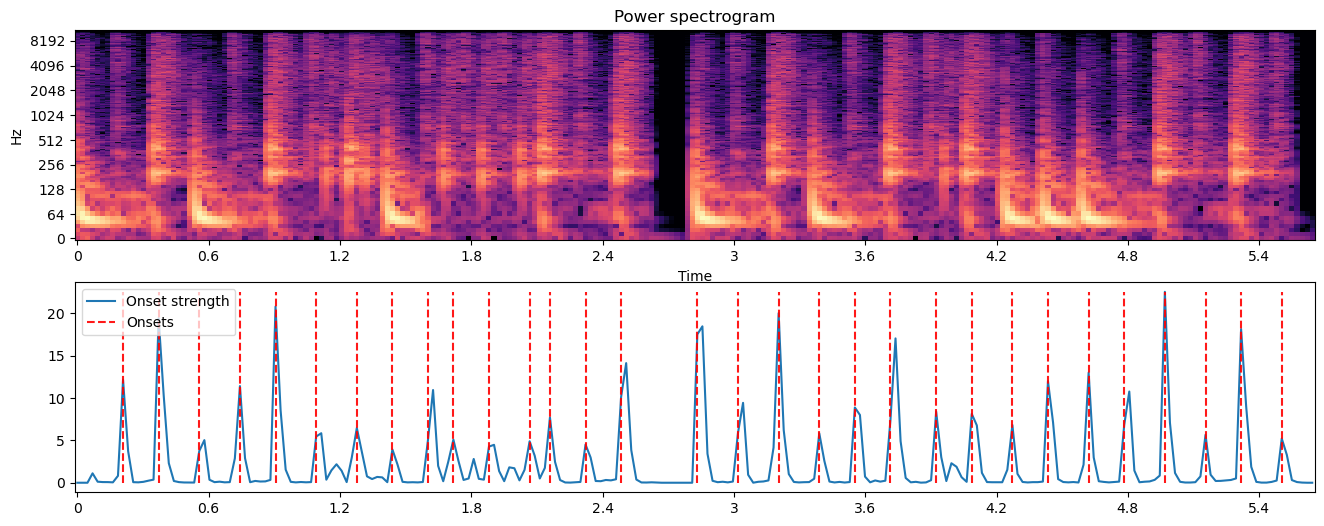

In [167]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

***Task 2***

Experiment with different settings for the your onset detector.

Provide a short discussion (max 250 words) on the advantages and disadvantages from having longer or shorter window_sizes and wait_times.